Подготовка среды и датафрейма с продажами Черной Пятницы (дата честно позаимствована с кэггла)

In [128]:
# Копипаста из туториала для подготовки рабочей среды
import warnings
warnings.simplefilter('ignore')

%pylab inline
%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 6,3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

Populating the interactive namespace from numpy and matplotlib


In [18]:
default_df = pd.read_csv('BlackFriday.csv')

In [19]:
default_df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [20]:
default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [21]:
#Оставим в дф наиболее интересные (и понятные) колонки. 
#Покупателя, Товар, Пол, Возраст, Семейное положение, Категорию товара, Сумму покупки
df = default_df[['User_ID','Product_ID','Gender','Age','Marital_Status','Product_Category_1','Purchase']]

In [22]:
df.head()

,User_ID,Product_ID,Gender,Age,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,0,3,8370
1,1000001,P00248942,F,0-17,0,1,15200
2,1000001,P00087842,F,0-17,0,12,1422
3,1000001,P00085442,F,0-17,0,12,1057
4,1000002,P00285442,M,55+,0,8,7969


In [16]:
len(df.Product_Category_1.unique())

18

График 1. используя matplotlib посмотрим распределение количества продаж по группам товаров.

In [37]:
df_mtplt = df['Product_Category_1'].value_counts()
df_mtplt

5     148592
1     138353
8     112132
11     23960
2      23499
6      20164
3      19849
4      11567
16      9697
15      6203
13      5440
10      5032
12      3875
7       3668
18      3075
14      1500
17       567
9        404
Name: Product_Category_1, dtype: int64

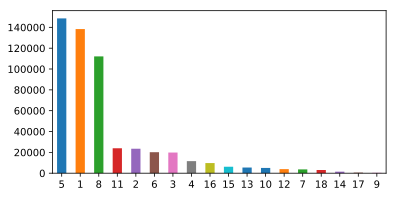

In [43]:
df_mtplt.plot(kind='bar', rot=0, stacked=False)

In [42]:
#Итак ТОП продаж Черной пятницы пришлось на три категории 5,1,8

График 2. используя seaborn построим горизонтальный бар для среднего чека в зависимости от возрастной группы.

In [76]:
df_age = df.groupby('Age')[['Purchase']].mean().reset_index()

In [81]:
df_age1 = df_age[['Age', 'Purchase']]
df_age1

,Age,Purchase
0,0-17,9020.126878
1,18-25,9235.197575
2,26-35,9314.588970
3,36-45,9401.478758
4,46-50,9284.872277
5,51-55,9620.616620
6,55+,9453.898579


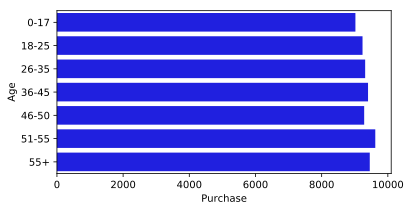

In [82]:
sns.barplot(x='Purchase', y='Age', data=df_age1, label='Средний чек по возрастным группам', color='b')

In [83]:
#Что удивительно, средний чек у всех возрастных групп примерно одинаковый!

График 3. Используя seaborn построим heatmap для возрастов и товарных групп!

In [126]:
df_heat = df.pivot_table(index='Product_Category_1', columns='Age', values='Purchase', aggfunc='count').fillna(0).applymap(float)
df_heat.head()

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Product_Category_1,,,,,,,
1,3524.0,26627.0,57398.0,27215.0,10292.0,8950.0,4347.0
2,789.0,4348.0,8784.0,4856.0,2068.0,1763.0,891.0
3,1180.0,4633.0,7524.0,3785.0,1343.0,908.0,476.0
4,744.0,2436.0,4124.0,2311.0,971.0,666.0,315.0
5,4280.0,28157.0,60487.0,28936.0,11736.0,9720.0,5276.0


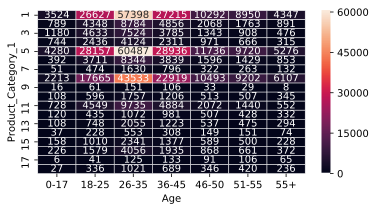

In [127]:
sns.heatmap(df_heat, annot=True,fmt=".0f", linewidths=.5)

График 4. Используя PLOTLY пострим line plot, и посмотрим покупатели какого пола больше совершили покупок в разных товарных группах 

In [132]:
df_gen = df.pivot_table(index='Product_Category_1', columns='Gender', values='Purchase', aggfunc='count').fillna(0).applymap(float)
df_gen.columns = ['Man', 'Woman']
df_gen.head()

,Man,Woman
Product_Category_1,,
1,24401.0,113952.0
2,5573.0,17926.0
3,5874.0,13975.0
4,3572.0,7995.0
5,41199.0,107393.0


In [133]:
trace0 = go.Scatter(
    x=df_gen.index,
    y=df_gen.Man,
    name='Men'
)

trace1 = go.Scatter(
    x=df_gen.index,
    y=df_gen.Woman,
    name='Women'
)

data = [trace0, trace1]
layout = {'title': 'Продажи среди мужчин и женщин в Черную пятницу'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)



In [134]:
#Нет ни одной категории, где мужчины сделали бы больше покупок!

График 5. Используя PLOTLY, посмотрим на распределение по среднему чеку для каждой группы товаров

In [135]:
df_sp = df.groupby('Product_Category_1')[['Purchase']].mean()
df_sp.head()

,Purchase
Product_Category_1,
1,13607.701495
2,11255.680752
3,10096.841705
4,2328.862886
5,6238.004045


In [139]:
trace0 = go.Scatter(
    x=df_sp.index,
    y=df_sp.Purchase,
    mode = 'markers+text',
    text = df_sp.index,
    textposition='bottom center'
)

data = [trace0]
layout = {'title': 'Средний чек в каждой группе'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

In [140]:
#Самый большой средний чек у 10 группы, однако в тройку лидеров (1,5,8) она не входит. Не повезло!